In [8]:
import tensorflow as tf

In [21]:

import numpy as np
import matplotlib.pyplot as plt

In [22]:
from tensorflow.examples.tutorials.mnist import  input_data
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [23]:
mnist.train.images.shape

(55000, 784)

In [24]:
mnist.train.labels.shape

(55000, 10)

In [25]:
image1=mnist.train.images[4119]
image1=np.array(image1,float)
image1=image1.reshape((28,28))

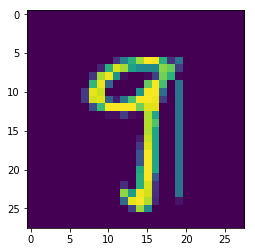

In [26]:
plt.imshow(image1)
plt.show()

In [27]:
n_input=784
n_hl1=256
n_hl2=256
n_output=10

weights={
    'h1':tf.Variable(tf.random_normal(shape=(n_input,n_hl1))),  # weight matrix for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl1,n_hl2))),    # weight matrix for layer 2
    'out':tf.Variable(tf.random_normal(shape=(n_hl2,n_output))) # weight matrix for layer 3
}
biases={
    'h1':tf.Variable(tf.random_normal(shape=(n_hl1,))),         # biases for layer 1
    'h2':tf.Variable(tf.random_normal(shape=(n_hl2,))),         # biases for layer 1
    'out':tf.Variable(tf.random_normal(shape=(n_output,)))      # biases for layer 1
}

In [28]:
def fwd_prop(x,weights,biases):
    layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    layer1=tf.nn.relu(layer1)  #activation 
    
    layer2=tf.add(tf.matmul(layer1,weights['h2']),biases['h2'])
    layer2=tf.nn.relu(layer2)
    
    output=tf.add(tf.matmul(layer2,weights['out']),biases['out'])
    return output

In [29]:


x=tf.placeholder('float',[None,n_input])      #since no. of input instance is different for training and testing
y=tf.placeholder(tf.int32,[None,n_output])

pred=fwd_prop(x,weights,biases)




In [30]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y)) #logits is because of multiple classes 

In [31]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)

In [32]:
optimize=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [33]:
batch_size=100
for i in range(25):
    num_batches=mnist.train.num_examples//batch_size
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

27096.071947574615
5218.45552513659
2880.3181716933423
1892.3022836896976
1566.6121447227915
1283.443366176928
1040.943579693328
1115.9954430881683
902.8889724455083
772.7058127981663
676.0550456542998
735.7091998429289
494.25867169706123
579.5282406869514
480.28201700966906
403.0543620557193
421.90908539430575
398.2288451842894
378.7047179486251
369.822000171029
269.7220260771506
249.0626928166688
192.33130354584696
254.8867835477498
242.2969108046155


In [34]:
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_preds=tf.equal(predictions,true_labels)
correct_ones=sess.run(correct_preds,feed_dict={x:mnist.test.images,y:mnist.test.labels})
correct_ones.sum()

9673

In [35]:
tf.trainable_variables() #checking trainable variables 

[<tf.Variable 'Variable:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_1:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_2:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_3:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_4:0' shape=() dtype=int32_ref>,
 <tf.Variable 'Variable_5:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_6:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'Variable_7:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'Variable_8:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_9:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'Variable_10:0' shape=(10,) dtype=float32_ref>]

In [36]:
#non sequential model has two simultaneous inputs of two diiferent types that require different NN then at some point their o/p combine